In [1]:

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
img_width, img_height = 224, 224

2023-06-21 00:37:46.603386: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [8]:
train_data_dir = 'output/train'
validation_data_dir = 'output/test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
# Batch size (number of samples propagated through the network at each training iteration)
batch_size = 16

In [9]:
# Checking the image data format used by Keras
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [10]:

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The output from the last convolutional layer is flattened into a 1D array
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# A dense layer with a single unit is added for binary classification
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:

model.compile(loss='binary_crossentropy',# It measures the difference between the predicted outputs and the true labels, aiming to minimize this difference during training
              optimizer='rmsprop', # It adapts the learning rate for each weight based on the magnitude of the gradients, allowing for faster convergence and better optimization performance
              metrics=['accuracy']) # It calculates the proportion of correctly classified samples out of the total number of samples

In [12]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 400 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Epoch 1/10


2023-06-21 00:10:15.969545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.5425

2023-06-21 00:10:33.302808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - 18s 695ms/step - loss: 0.8771 - accuracy: 0.5425 - val_loss: 0.6040 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 18s 710ms/step - loss: 0.6720 - accuracy: 0.6200
Epoch 3/10
25/25 [==============================] - 18s 717ms/step - loss: 0.5703 - accuracy: 0.7400
Epoch 4/10
25/25 [==============================] - 17s 675ms/step - loss: 0.3918 - accuracy: 0.8600
Epoch 5/10
25/25 [==============================] - 16s 632ms/step - loss: 0.2833 - accuracy: 0.8975
Epoch 6/10
25/25 [==============================] - 16s 634ms/step - loss: 0.2117 - accuracy: 0.9300
Epoch 7/10
25/25 [==============================] - 16s 645ms/step - loss: 0.2596 - accuracy: 0.9350
Epoch 8/10
25/25 [==============================] - 15s 612ms/step - loss: 0.1668 - accuracy: 0.9525
Epoch 9/10
25/25 [==============================] - 17s 685ms/step - loss: 0.2167 - accuracy: 0.9675
Epoch 10/10
25/25 [==============================] - 17s 662

In [13]:
model.save_weights('model_concrete_saved.h5')
model.save('modelo_concreto_saved.h5')


In [23]:

from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model('modelo_concreto_saved.h5')
 
image = load_img('archive2/Negative/19999.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
print("Predicted \Class (0 - Negative , 1- Positive): ", label[0][0])

1/1 [==============================] - 0s 65ms/step
Predicted \Class (0 - Negative , 1- Positive):  0.010734154


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load the pre-trained model
model = load_model('modelo_concreto_saved.h5')

# Set the folder path containing the images
folder_path = 'output/validation/Negative'

# Initialize empty lists for storing predictions
negative_predictions = []

# Iterate over the images in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Load and preprocess the image
        image_path = os.path.join(root, file)
        image = load_img(image_path, target_size=(224, 224))
        img = img_to_array(image)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the model
        pred = model.predict(img)
        negative_predictions.append(pred[0][0])

# Convert the negative_predictions to numpy array
negative_predictions = np.array(negative_predictions)




1/1 [==============================] - 0s 57ms/step


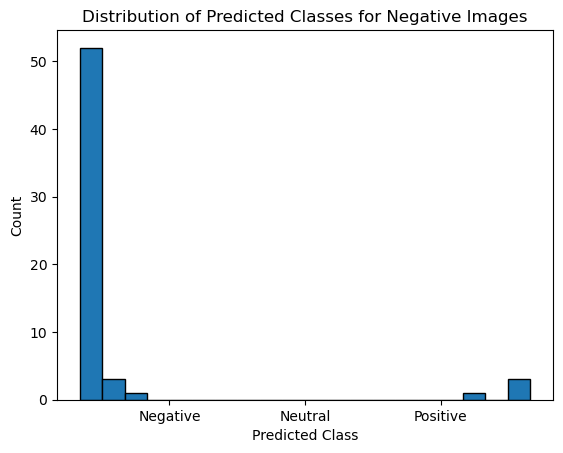

In [23]:
# Plot the histogram
plt.hist(negative_predictions, bins=20, edgecolor='black')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0.2, 0.5, 0.8], ['Negative', 'Neutral', 'Positive'])  # Adjust the labels based on your classes
plt.title('Distribution of Predicted Classes for Negative Images')
plt.show()

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load the pre-trained model
model = load_model('modelo_concreto_saved.h5')

# Set the folder path containing the images
folder_path = 'output/validation/Positive'

# Initialize empty lists for storing predictions
positive_predictions = []

# Iterate over the images in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Load and preprocess the image
        image_path = os.path.join(root, file)
        image = load_img(image_path, target_size=(224, 224))
        img = img_to_array(image)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction using the model
        pred = model.predict(img)
        positive_predictions.append(pred[0][0])

# Convert the predictions to numpy array
positive_predictions = np.array(positive_predictions)



1/1 [==============================] - 0s 85ms/step


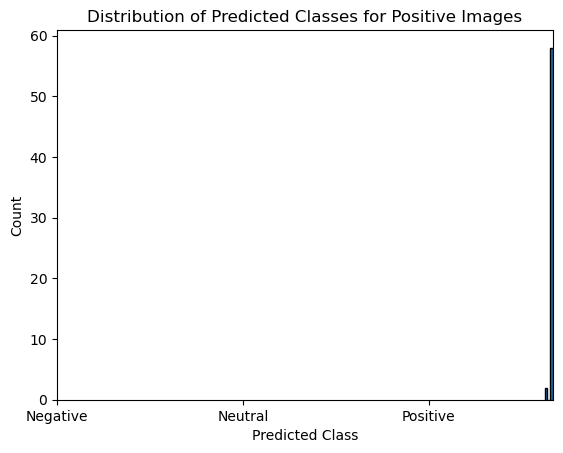

In [25]:

# Plot the histogram
plt.hist(positive_predictions, bins=3, edgecolor='black')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0.2, 0.5, 0.8], ['Negative', 'Neutral', 'Positive'])  # Adjust the labels based on your classes
plt.title('Distribution of Predicted Classes for Positive Images')
plt.show()